In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pylab as pl

In [2]:
df = pd.read_csv ("House Price Data.csv")
df.head ()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [3]:
cdf = df [['price', 'bedrooms', 'yr_built', 'yr_renovated','sqft_lot']]
cdf.head ()

,price,bedrooms,yr_built,yr_renovated,sqft_lot
0,313000.0,3.0,1955,2005,7912
1,2384000.0,5.0,1921,0,9050
2,342000.0,3.0,1966,0,11947
3,420000.0,3.0,1963,0,8030
4,550000.0,4.0,1976,1992,10500


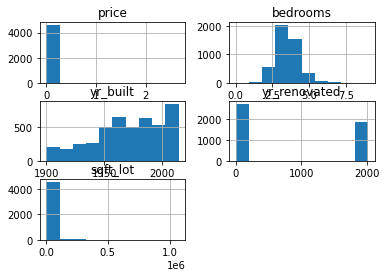

In [5]:
viz = cdf[['price', 'bedrooms', 'yr_built', 'yr_renovated','sqft_lot']]
viz.hist()
plt.show()

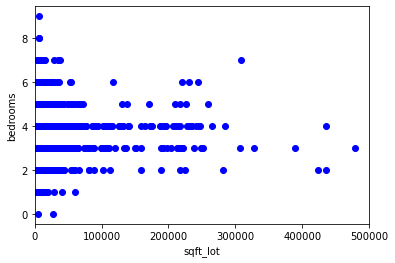

In [11]:
plt.scatter(cdf.sqft_lot, cdf.bedrooms,  color='blue')
plt.xlabel("sqft_lot")
plt.ylabel("bedrooms")
#plt.ylim(0, 5000000)
plt.xlim(0, 500000)
plt.show()

In [12]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

In [15]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['bedrooms', 'yr_built','sqft_lot']])
train_y = np.asanyarray(train[['price']])
regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[ 1.18157582e+05 -1.97168885e+02  5.76869943e-01]]
Intercept:  [530739.9411961]


In [17]:
y_hat= regr.predict(test[['bedrooms', 'yr_built', 'sqft_lot']])
x = np.asanyarray(test[['bedrooms', 'yr_built', 'sqft_lot']])
y = np.asanyarray(test[['price']])
print("Residual sum of squares: %.2f"
      % np.mean((y_hat - y) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(x, y))

Residual sum of squares: 133372197042.06
Variance score: 0.12
